In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
%matplotlib inline

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [16]:
Data = pd.read_csv('Features.csv')
Data.head()

,Mean,Standard Deviation,SE of mean,Variance,Skewness,Kurtosis,Coefficient of Variation,Mean absolute Deviation,Mode,Harmonic Mean,Median,Flowrate
0,2.988890,0.112882,0.000564,0.012742,2.515207,10.459889,0.037767,0.070676,2.959532,2.584968,2.959532,L
1,2.592975,0.110564,0.000553,0.012224,1.621947,10.901485,0.036941,0.068431,2.959532,2.989225,2.959532,Leakages
2,2.994869,0.111194,0.000556,0.012364,2.622178,10.918732,0.037128,0.068784,2.959532,2.591081,2.959532,L
3,2.697241,0.112246,0.000561,0.012599,1.530313,10.554527,0.037450,0.069928,2.959532,2.993373,2.959532,Leakages
4,3.099304,0.111688,0.000558,0.012474,2.572693,10.724008,0.037238,0.069026,2.959532,2.695481,2.959532,L


In [17]:
cls = list(Data.keys())
cls

['Mean ',
 'Standard Deviation ',
 'SE of mean',
 'Variance',
 'Skewness',
 'Kurtosis',
 'Coefficient of Variation',
 'Mean absolute Deviation',
 'Mode ',
 'Harmonic Mean ',
 'Median',
 'Flowrate']

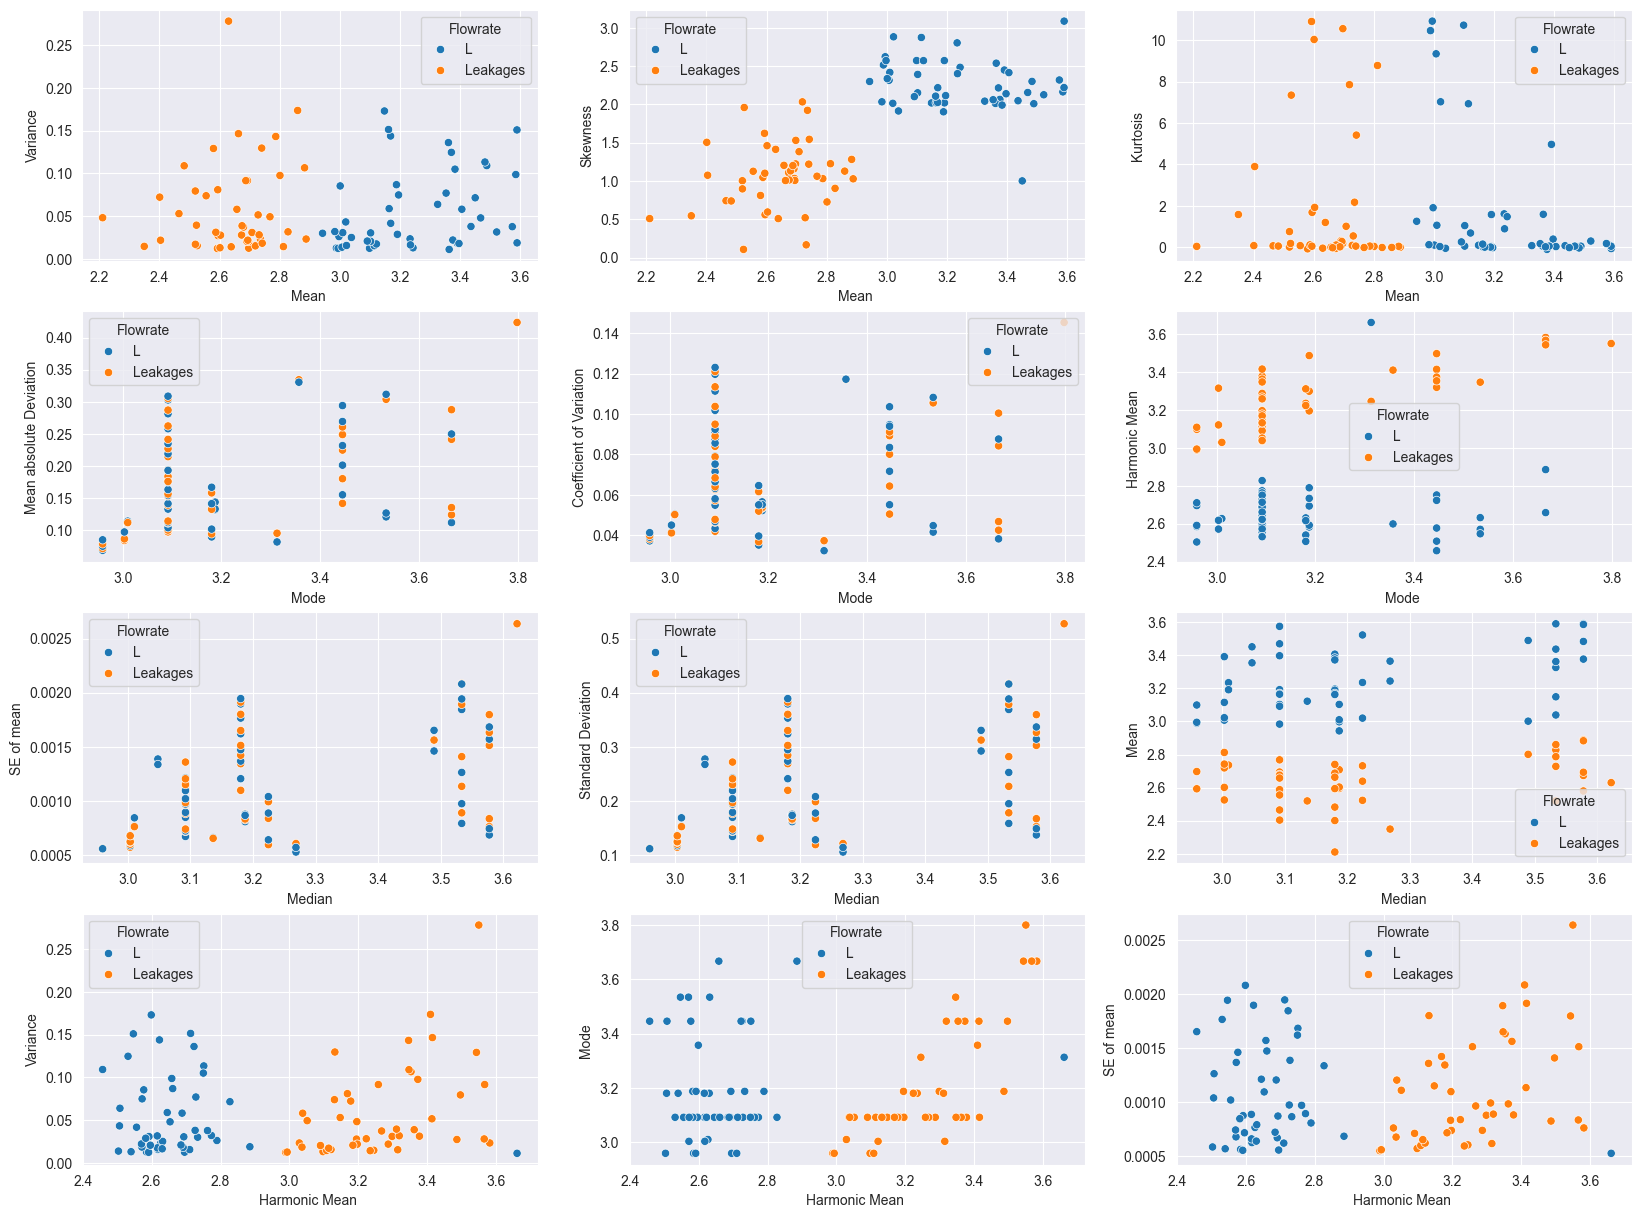

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
sns.scatterplot(ax =axes[0,0], data=Data, x = 'Mean ', y='Variance', hue='Flowrate')
sns.scatterplot(ax =axes[0,1], data=Data, x = 'Mean ', y='Skewness', hue='Flowrate')
sns.scatterplot(ax =axes[0,2], data=Data, x = 'Mean ', y='Kurtosis', hue='Flowrate')
sns.scatterplot(ax =axes[1,0], data=Data, x = 'Mode ', y='Mean absolute Deviation', hue='Flowrate')
sns.scatterplot(ax =axes[1,1], data=Data, x = 'Mode ', y='Coefficient of Variation', hue='Flowrate')
sns.scatterplot(ax =axes[1,2], data=Data, x = 'Mode ', y='Harmonic Mean ', hue='Flowrate')
sns.scatterplot(ax =axes[2,0], data=Data, x = 'Median', y='SE of mean', hue='Flowrate')
sns.scatterplot(ax =axes[2,1], data=Data, x = 'Median', y='Standard Deviation ', hue='Flowrate')
sns.scatterplot(ax =axes[2,2], data=Data, x = 'Median', y='Mean ', hue='Flowrate')
sns.scatterplot(ax =axes[3,0], data=Data, x = 'Harmonic Mean ', y='Variance', hue='Flowrate')
sns.scatterplot(ax =axes[3,1], data=Data, x = 'Harmonic Mean ', y='Mode ', hue='Flowrate')
sns.scatterplot(ax =axes[3,2], data=Data, x = 'Harmonic Mean ', y='SE of mean', hue='Flowrate')
plt.savefig('r.jpg')

In [19]:
scale = StandardScaler()
X = scale.fit_transform(Data.iloc[:,:-1])

In [20]:
pca = PCA(n_components = 0.8)
model = pca.fit_transform(X)

In [21]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.54195598 0.224654   0.13544077]
[6.02493612 2.49748333 1.5056979 ]


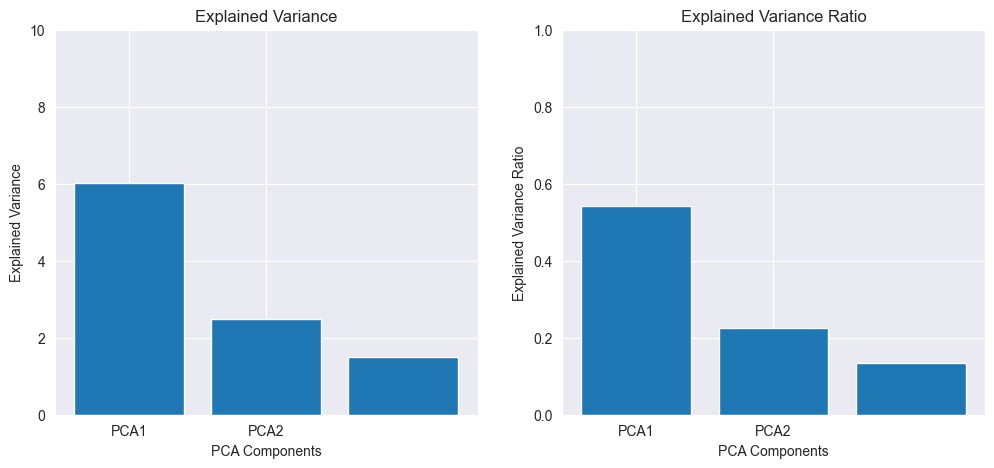

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(range(1, len(pca.explained_variance_)+1), pca.explained_variance_)
plt.ylim(0,10)
plt.xticks(ticks=[1,2],labels=['PCA1','PCA2'])
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance')
plt.subplot(1,2,2)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
#plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(axis=0))
plt.ylim(0,1)
plt.xticks(ticks=[1,2],labels=['PCA1','PCA2'])
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.savefig('Explained.jpg')


In [23]:
PCA_Data = pd.DataFrame(data=model, columns=['PCA 1','PCA 2'])
PCA_Data['Target'] = LabelEncoder().fit_transform(Data['Flowrate'])
PCA_Data.head()

ValueError: Shape of passed values is (95, 3), indices imply (95, 2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(PCA_Data.iloc[:, :-1], PCA_Data.iloc[:, -1], test_size=00.2, random_state=0)
x_train.shape

In [ ]:
sns_plot = sns.lmplot(x='PCA 1', y='PCA 2', data= PCA_Data, hue='Target', fit_reg=False)
sns_plot.figure.savefig('out.png')


In [ ]:
splits = StratifiedKFold(n_splits=5,shuffle=True, random_state=0)
Svc = SVC()
Lda = LinearDiscriminantAnalysis()
Sv = cross_validate(Svc,x_train, y_train, cv=splits, return_train_score=True, return_estimator=True)
Lv = cross_validate(Lda, x_train, y_train, cv=splits,return_train_score=True, return_estimator=True)

In [ ]:
scores = pd.DataFrame({'SVC': Sv['train_score'],
                      "LDA": Lv['train_score']})
scores

In [ ]:
k_neighbors =  range(3,9,2)
for k in k_neighbors:
    Cl_knn = KNeighborsClassifier(n_neighbors=k)
    knncv_scr = cross_validate(Cl_knn, x_train, y_train, cv=splits, return_estimator=True, return_train_score=True)
    knnscore = pd.DataFrame({k: knncv_scr['train_score']})   
    print(knnscore)

In [ ]:
C= [1,10,100,1000]
for c in C:
    cl_svm = SVC(C=c, gamma=1,kernel='linear')
    cl_svm.fit(x_train,y_train)
    svm_pred = cl_svm.predict(x_train)
    #svm_prob = cl_svm.predict_proba(X_test)
    print(cl_svm.score(x_train, y_train))

In [ ]:
gdModel = KNeighborsClassifier()
params = [{ 'n_neighbors':[3,5,7,9],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : [5,10,15,10]
          }]
Gdkmodel = GridSearchCV(estimator=gdModel, param_grid=params, scoring='accuracy', return_train_score=True, cv=splits)
Gdkmodel.fit(x_train, y_train)
print(Gdkmodel.best_params_)
print(Gdkmodel.best_score_)

In [ ]:
cl_lda = LinearDiscriminantAnalysis(shrinkage=0.3, solver='eigen')
cl_lda.fit(x_train,y_train)
lda_pred = cl_lda.predict(x_train)
lda_prob = cl_lda.predict_proba(x_test)
print(cl_lda.score(x_train, y_train))

In [ ]:
cl_knn1 = KNeighborsClassifier(n_neighbors=3)
cl_knn1.fit(x_train, y_train)
print(cl_knn1.score(x_train,y_train))

cl_svm = SVC(C=1000, gamma=1,kernel='rbf')
cl_svm.fit(x_train,y_train)
print(cl_svm.score(x_train,y_train))

In [ ]:
knnt_pred = cl_knn1.predict(x_test)
ldat_pred = cl_lda.predict(x_test)
svmt_pred = cl_svm.predict(x_test)


y_test = list(y_test)
outcomes = pd.DataFrame(data=y_test, columns=['Actual value'])
outcomes['KNN_PRED'] = knnt_pred
outcomes['LDA_PRED'] = ldat_pred
outcomes['SVM_PRED'] = svmt_pred
outcomes

In [ ]:
print('KNN Accuracy: ', accuracy_score(y_test, knnt_pred))
print('SVM Accuracy: ', accuracy_score(y_test, svmt_pred))
print('LDA Accuracy: ', accuracy_score(y_test, ldat_pred))